In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [109]:
df = pd.read_csv("Classifier_inputs.csv")

In [110]:
df.head(1)

,Unnamed: 0,loc_desc,Arrest,Domestic,Beat,District,Ward,area,FBI,Year,Longitude,Latitude
0,0,17,1,1,1022,10.0,24.0,29.0,10,2016,-87.706819,41.864073


In [111]:
df.columns

Index(['Unnamed: 0', 'loc_desc', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'area', 'FBI', 'Year', 'Longitude', 'Latitude'],
      dtype='object')

In [112]:
features = ['loc_desc', 'Arrest', 'Domestic', 'Beat', 'District','Ward', 'area',  'Year']

In [113]:
X = pd.read_csv("targets.csv")
X.head(1)

,Unnamed: 0,Primary Type
0,0,BATTERY


In [114]:
X['Primary Type'].value_counts()

THEFT                                322428
BATTERY                              258945
CRIMINAL DAMAGE                      152814
NARCOTICS                            131182
ASSAULT                               89512
OTHER OFFENSE                         85362
BURGLARY                              81673
DECEPTIVE PRACTICE                    68342
MOTOR VEHICLE THEFT                   59856
ROBBERY                               56096
CRIMINAL TRESPASS                     36429
WEAPONS VIOLATION                     16983
PUBLIC PEACE VIOLATION                13015
OFFENSE INVOLVING CHILDREN            10591
PROSTITUTION                           7567
CRIM SEXUAL ASSAULT                    6298
INTERFERENCE WITH PUBLIC OFFICER       6136
SEX OFFENSE                            4491
HOMICIDE                               2590
GAMBLING                               2211
ARSON                                  2175
LIQUOR LAW VIOLATION                   1928
KIDNAPPING                      

In [115]:
X['Primary Type'].nunique()

33

In [116]:
pca = PCA(n_components=3)

x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf

,principal component 1,principal component 2,principal component 3
0,-0.183806,2.438772,0.793938
1,-1.622242,1.719677,-1.199534
2,1.365219,-0.262554,-1.758845
3,1.051929,-0.212004,-1.737007
4,0.881616,1.825419,-1.138826
...,...,...,...
1419597,-0.051769,2.445207,0.799289
1419598,-1.655945,2.404694,0.799924
1419599,-1.294231,-0.286730,-1.758600
1419600,-1.989704,1.517129,-1.298548


[0.37341129 0.15067174 0.12900354]


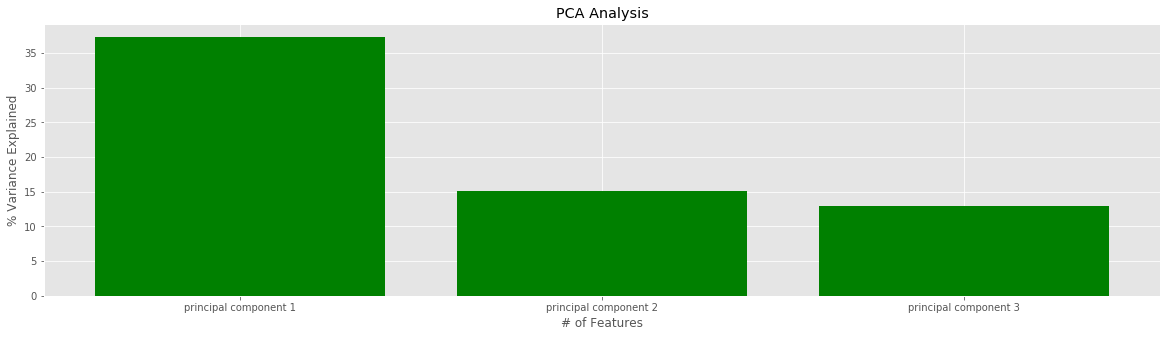

In [117]:
variance = pca.explained_variance_ratio_ #calculate variance ratios
print(variance)

var=np.round(variance, decimals=3)*100


plt.figure(figsize = (20,5))

plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(principalDf.columns)]

plt.bar(x_pos, var, color='green')
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')

plt.xticks(x_pos, principalDf.columns)

plt.show()

In [118]:
finalDf = pd.concat([principalDf, X[['Primary Type']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,Primary Type
0,-0.183806,2.438772,0.793938,BATTERY
1,-1.622242,1.719677,-1.199534,BATTERY
2,1.365219,-0.262554,-1.758845,PUBLIC PEACE VIOLATION
3,1.051929,-0.212004,-1.737007,BATTERY
4,0.881616,1.825419,-1.138826,THEFT


In [119]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
finalDf['Primary Type'] = LE.fit_transform(finalDf['Primary Type'])
finalDf.head()

,principal component 1,principal component 2,principal component 3,Primary Type
0,-0.183806,2.438772,0.793938,2
1,-1.622242,1.719677,-1.199534,2
2,1.365219,-0.262554,-1.758845,27
3,1.051929,-0.212004,-1.737007,2
4,0.881616,1.825419,-1.138826,31


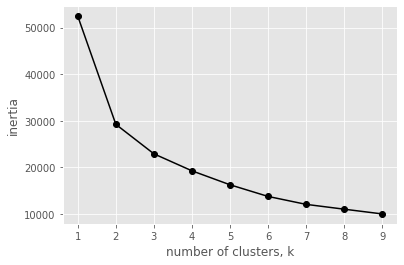

In [97]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(principalDf.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [120]:
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

N = 33
# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)



In [121]:
cmap

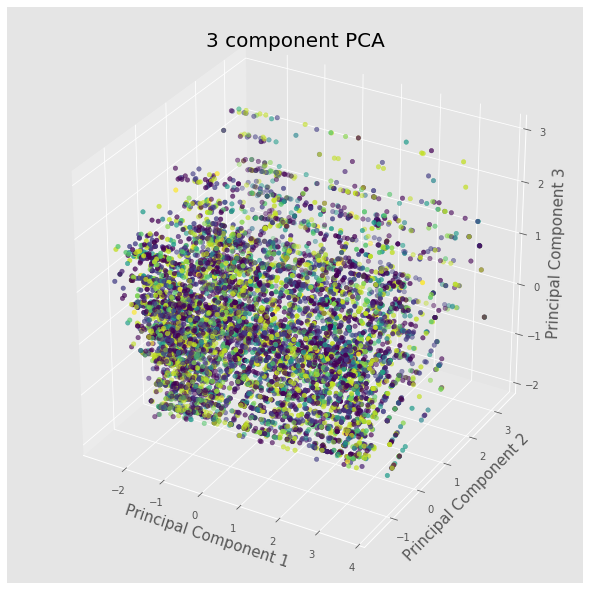

In [100]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 12)

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3 component PCA', fontsize = 20)

# LABEL_COLOR_MAP = {0 : 'r',1 : 'b', 2 : 'g'}
LABEL_COLOR_MAP = viridis(np.linspace(0, 1, 35))

label_color = [LABEL_COLOR_MAP[l] for l in finalDf['Primary Type']]

ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3'],
           c=label_color)

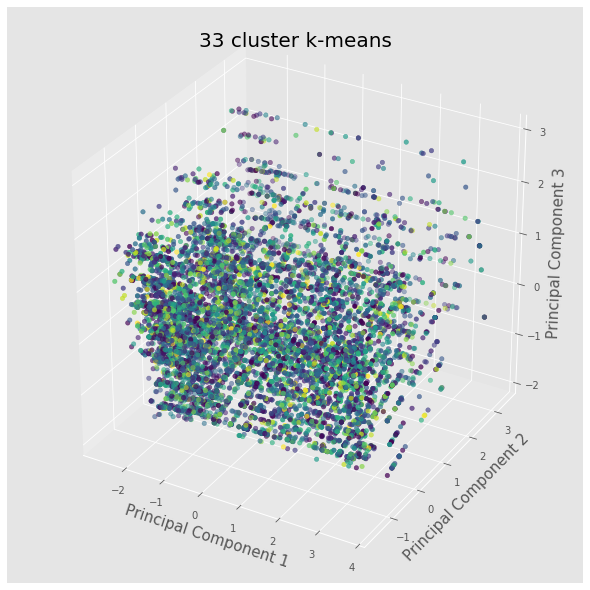

In [101]:
kmean = KMeans(n_clusters=33).fit(df[features])
cl = kmean.cluster_centers_

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('33 cluster k-means', fontsize = 20)


# LABEL_COLOR_MAP = {0 : 'r', 1 : 'b', 2 :'g'}


label_color = [LABEL_COLOR_MAP[l] for l in kmean.labels_]
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3']
             , c=label_color  )

C:\Users\Dhruv-PC\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


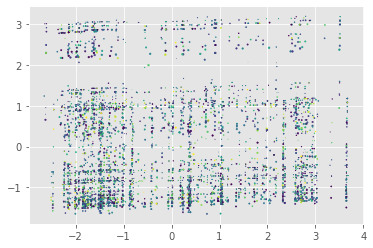

In [102]:
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3'], c=label_color)

In [122]:
kmean.labels_

array([0, 6, 6, ..., 8, 0, 7])

In [123]:
kmean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [126]:
# features = ['loc_desc', 'Arrest', 'Domestic', 'Beat', 'District','Ward', 'area', 'FBI', 'Year', 'Longitude', 'Latitude']

features = ['loc_desc', 'Arrest', 'Domestic', 'Beat', 'District','Ward', 'area',  'Year', 'Longitude', 'Latitude']
kmean = KMeans(n_clusters=6).fit(x)
cl = kmean.cluster_centers_

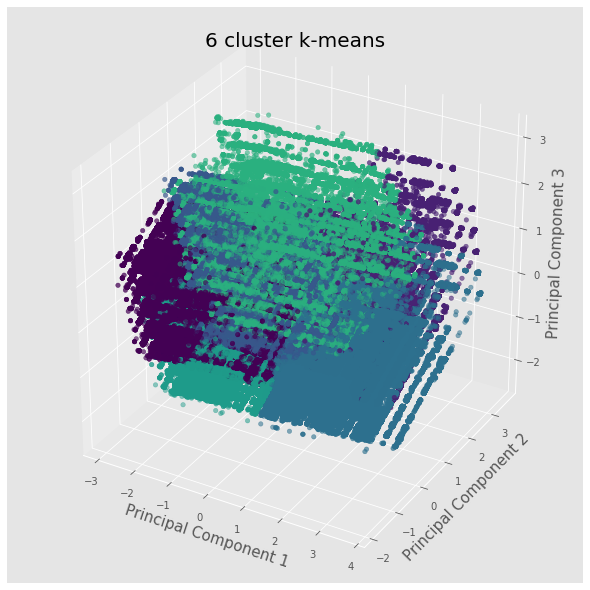

In [127]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('6 cluster k-means', fontsize = 20)


# LABEL_COLOR_MAP = {0 : 'r', 1 : 'b', 2 :'g'}

LABEL_COLOR_MAP = viridis(np.linspace(0, 1, 9))
label_color = [LABEL_COLOR_MAP[l] for l in kmean.labels_]
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3']
             , c=label_color  )

In [128]:
len(kmean.labels_)

1419602

In [129]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['primary_type'] = finalDf['Primary Type']
cluster_map['cluster'] = kmean.labels_
features = ['primary_type', 'cluster']
temp = (cluster_map[features]).groupby(features).aggregate({"primary_type":['count']})
temp = temp.reset_index()
temp.columns = ['primary_type', 'cluster', 'count']
df_agg = temp.groupby(['primary_type', 'cluster']).agg({'count':sum})
g = df_agg['count'].groupby(level=0, group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(2))

res = res.reset_index()
res
# df.loc[df["Community Area"].isnull(),"Community Area"]  = df['Ward'].map(res.Community)

,primary_type,cluster,count
0,0,4,961
1,0,3,382
2,1,4,25855
3,1,5,19272
4,2,5,106661
...,...,...,...
61,30,4,176
62,31,4,120204
63,31,1,70312
64,32,0,9581


In [ ]:
targets = X['Primary Type'].replace({    
'ROBBERY':0,
'THEFT':0,
'BURGLARY':0,
'ARSON':1,
'BATTERY':1,
'ASSAULT':1,
'KIDNAPPING':1,
'HOMICIDE':1,
'MOTOR VEHICLE THEFT':2,
'CRIMINAL DAMAGE':2,
'CRIMINAL TRESPASS':2,
'PUBLIC PEACE VIOLATION':2,
'DECEPTIVE PRACTICE':2,
'INTERFERENCE WITH PUBLIC OFFICER':2,
'INTIMIDATION':2,
'STALKING':3,
'CRIM SEXUAL ASSAULT':3,
'NARCOTICS':3,
'SEX OFFENSE':3,
'OBSCENITY':3,
'OFFENSE INVOLVING CHILDREN':3,
'PROSTITUTION':3,
'PUBLIC INDECENCY':3,
'HUMAN TRAFFICKING':3,
'WEAPONS VIOLATION':4,
'LIQUOR LAW VIOLATION':4,   
'CONCEALED CARRY LICENSE VIOLATION':4,
'GAMBLING':4,
'NARCOTICS':4,
'OTHER NARCOTIC VIOLATION':4,
'NON-CRIMINAL':5,
'OTHER OFFENSE':5,   
'NON-CRIMINAL (SUBJECT SPECIFIED)':5,
'NON - CRIMINAL':5
})


In [ ]:
finalDf_grouping = pd.concat([principalDf, X[['Primary Type']]], axis = 1)
finalDf.head()

In [130]:
cluster_map = pd.DataFrame()
cluster_map['primary_type'] = finalDf['Primary Type']
cluster_map['cluster'] = kmean.labels_
cluster_map.head()


,primary_type,cluster
0,2,5
1,2,5
2,27,3
3,2,3
4,31,5


In [131]:
features = ['primary_type', 'cluster']
temp = (cluster_map[features]).groupby(features).aggregate({"primary_type":['count']})
temp = temp.reset_index()
temp.columns = ['primary_type', 'cluster', 'count']

In [ ]:
df_agg = temp.groupby(['primary_type','cluster']).agg({'count':sum})
g = df_agg['count'].groupby(level=0, group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(1))

In [135]:
res = pd.DataFrame(res)
res.head()

,,count
primary_type,cluster,
0,4,961
1,4,25855
2,5,106661
3,4,27624
4,0,34


In [138]:
res.to_csv("primary_type_table.csv")

In [81]:
res

primary_type  cluster
0             1            654
1             1          15972
2             2          74520
3             8          20483
4             0             35
5             8           1261
6             1          37708
7             0          14973
8             6          16576
9             0           1835
10            1            704
11            8              8
12            0           4099
13            6            135
14            6            220
15            0            951
16            6          19167
17            0          93970
18            1             22
19            6             25
20            2              3
21            0             69
22            2           3128
23            6             13
24            2          14992
25            0           5839
26            0             31
27            0           7238
28            1          16427
29            6            973
30            2            203
31            6  

In [82]:
a = (temp).groupby(['primary_type','cluster'],sort = True)
a.head()

,primary_type,cluster,count
0,0,0,85
1,0,1,654
2,0,2,62
3,0,3,149
4,0,4,60
...,...,...,...
264,32,4,713
265,32,5,679
266,32,6,2055
267,32,7,15


In [83]:
finalDf = pd.concat([df, X[['Primary Type']]], axis = 1)
features = ['loc_desc', 'Arrest', 'Domestic', 'Beat', 'District','Ward', 'area',  'Year']

temp = finalDf.sample(10000)

pca = PCA(n_components=3)

x = temp.loc[:, features].values
x = StandardScaler().fit_transform(x)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [84]:
LE = LabelEncoder()
temp['Primary Type'] = LE.fit_transform(temp['Primary Type'])
temp.head()

,Unnamed: 0,loc_desc,Arrest,Domestic,Beat,District,Ward,area,FBI,Year,Longitude,Latitude,Primary Type
534720,542082,15,0,0,1013,10.0,22.0,29.0,7,2013,-87.734472,41.850472,25
1260459,1275412,125,1,0,1524,15.0,37.0,25.0,20,2016,-87.759867,41.894897,15
29699,35702,76,1,0,1232,12.0,27.0,28.0,7,2015,-87.647342,41.881203,25
600306,607669,125,0,0,235,2.0,5.0,41.0,16,2013,-87.587847,41.787887,5
1321257,1339892,135,0,0,1411,14.0,35.0,22.0,7,2016,-87.706119,41.929248,25


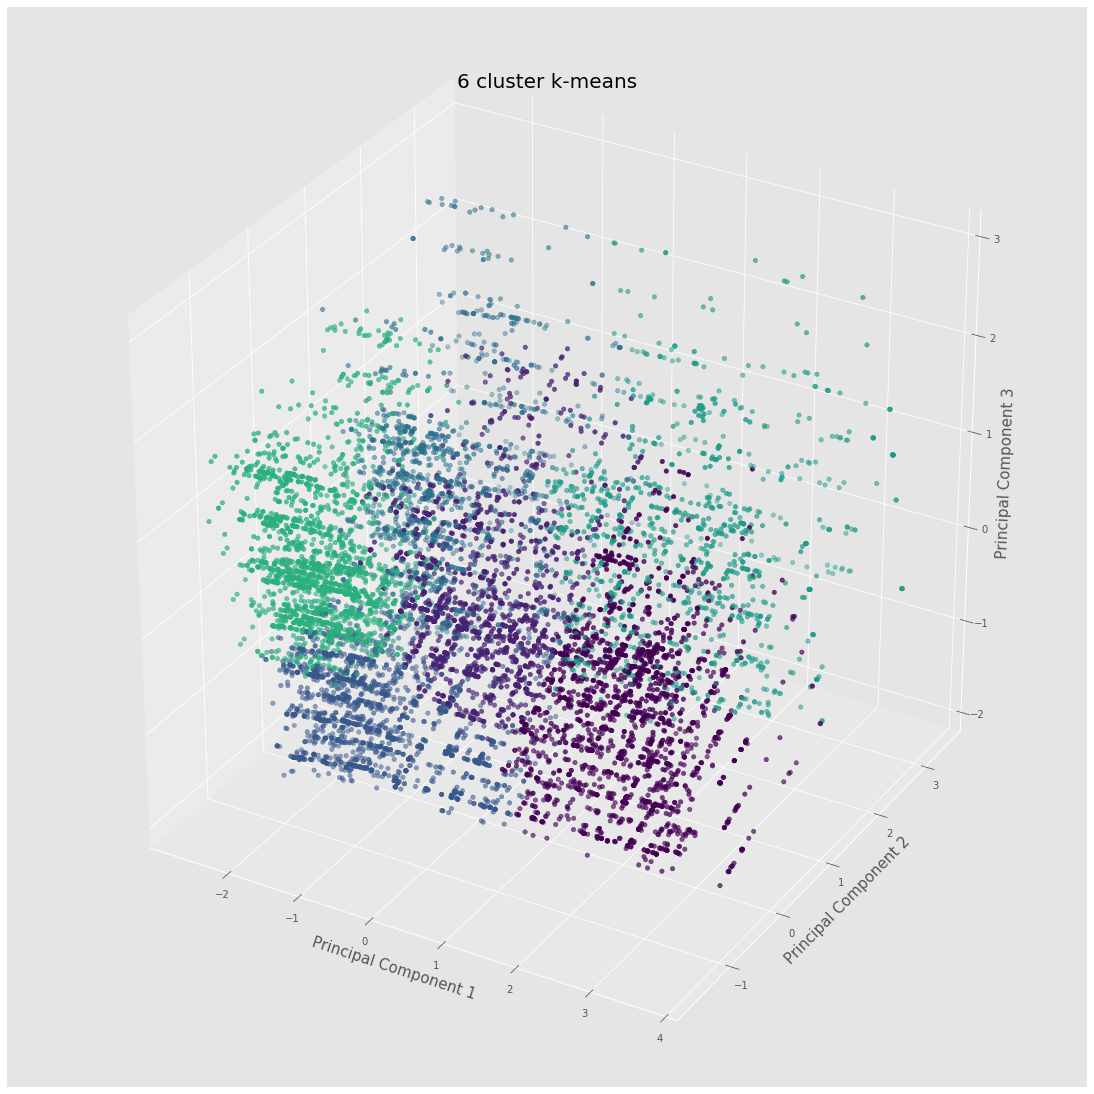

In [85]:
pca_df = pd.concat([principalDf, temp['Primary Type']], axis = 1)
kmean = KMeans(n_clusters=6).fit(principalDf)
cl = kmean.cluster_centers_


fig = plt.figure(figsize = (15,15))
ax = Axes3D(fig)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('6 cluster k-means', fontsize = 20)


# LABEL_COLOR_MAP = {0 : 'r', 1 : 'b', 2 :'g'}

LABEL_COLOR_MAP = viridis(np.linspace(0, 1, 9))
label_color = [LABEL_COLOR_MAP[l] for l in kmean.labels_]
ax.scatter(pca_df['principal component 1'], pca_df['principal component 2'], pca_df['principal component 3']
             , c=label_color  )